In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
df = pd.read_excel('Data_Train.xlsx')

In [348]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [349]:
df.shape

(10683, 11)

In [350]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [351]:
df.dropna(inplace=True)

# remove null values

In [352]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [353]:
df.info()

# all input features are categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [354]:
# example date conversion using pandas 'to_datetime' function

d = '21/11/2019'   # sample date in String format

a = pd.to_datetime(d,format='%d/%m/%Y')
a

Timestamp('2019-11-21 00:00:00')

In [355]:
a.month

# month

11

In [356]:
a.day

21

In [357]:
# lets create new columns in the data for the journey day and month

df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'],format = '%d/%m/%Y').dt.day

df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [358]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [359]:
# Since the journey month and day are extracted as separated columns,drop the 'Date_of_Journey' column,as it is no longer needed

df.drop('Date_of_Journey',axis=1,inplace=True)

In [360]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [361]:
# similarly extract the departure hour and minute

df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

# Since the departure hour and minutes are extracted, we can drop 'Dep_Time' column, as it is no longer needed

df.drop('Dep_Time',axis=1,inplace=True)

In [362]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [363]:
# similarly extract the arrival hour and minute

df['Arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Since the arrival hour and minutes are extracted, we can drop 'Arrival_Time' column, as it is no longer needed

df.drop('Arrival_Time',axis=1,inplace=True)

In [364]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [365]:
hours = []
mins = []
for i in df['Duration']:
    a = i.split()
    if len(a)==1:
        if 'h' in i:
            hours.append(int(a[0].split(sep='h')[0]))
            mins.append(0)
        elif 'm' in i:
            mins.append(int(a[0].split(sep='m')[0]))
            hours.append(0)        
    else:
        hours.append(int(a[0].split(sep='h')[0]))
        mins.append(int(a[1].split(sep='m')[0]))

In [366]:
for i,j,k in zip(df['Duration'],hours,mins):
    print(i,j,k)

2h 50m 2 50
7h 25m 7 25
19h 19 0
5h 25m 5 25
4h 45m 4 45
2h 25m 2 25
15h 30m 15 30
21h 5m 21 5
25h 30m 25 30
7h 50m 7 50
13h 15m 13 15
2h 35m 2 35
2h 15m 2 15
12h 10m 12 10
2h 35m 2 35
26h 35m 26 35
4h 30m 4 30
22h 35m 22 35
23h 23 0
20h 35m 20 35
5h 10m 5 10
15h 20m 15 20
2h 50m 2 50
2h 55m 2 55
13h 20m 13 20
15h 10m 15 10
5h 45m 5 45
5h 55m 5 55
2h 50m 2 50
2h 15m 2 15
2h 15m 2 15
13h 25m 13 25
2h 50m 2 50
22h 22 0
5h 30m 5 30
10h 25m 10 25
5h 15m 5 15
2h 30m 2 30
6h 15m 6 15
11h 55m 11 55
11h 5m 11 5
8h 30m 8 30
22h 5m 22 5
2h 45m 2 45
12h 12 0
2h 50m 2 50
2h 50m 2 50
2h 15m 2 15
16h 5m 16 5
19h 55m 19 55
3h 15m 3 15
25h 20m 25 20
2h 50m 2 50
3h 3 0
2h 50m 2 50
16h 15m 16 15
15h 5m 15 5
2h 15m 2 15
6h 30m 6 30
25h 5m 25 5
12h 25m 12 25
27h 20m 27 20
10h 15m 10 15
10h 30m 10 30
2h 15m 2 15
10h 25m 10 25
2h 50m 2 50
1h 30m 1 30
13h 20m 13 20
2h 15m 2 15
1h 25m 1 25
26h 30m 26 30
7h 20m 7 20
13h 30m 13 30
5h 5 0
2h 45m 2 45
2h 50m 2 50
1h 30m 1 30
19h 5m 19 5
2h 15m 2 15
14h 50m 14 50


In [367]:
# create new columns in the dataset for duration in hours and minutes

df['Duration_hours'] = hours
df['Duration_minutes'] = mins

In [368]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [369]:
# lets drop the 'Duration'
df.drop('Duration',axis=1,inplace=True)

In [370]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [371]:
# Categorical features- one hot encoding

In [372]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [373]:
# lets do onehot encoding of 'Airline' column
sns.catplot(x='Airline',y='Price', data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

In [374]:
airline = df['Airline']

airline = pd.get_dummies(airline, drop_first=True)

airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [375]:
# source and destination

In [376]:
source = df[['Source']]
source = pd.get_dummies(source, drop_first=True)

destination = df[['Destination']]
destination = pd.get_dummies(destination, drop_first=True)

In [377]:
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [378]:
type(source)

pandas.core.frame.DataFrame

In [379]:
type(destination)

pandas.core.frame.DataFrame

In [380]:
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [381]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [382]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [383]:
# 'Additional_Info' has No info (majority of the time), so lets drop it
df.drop('Additional_Info',axis=1,inplace=True)

In [384]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [385]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [386]:
# Route and Total_stops are conveying same information
# so lets drop 'Route'

df.drop('Route', axis=1, inplace=True)

In [387]:
# 'total_stops' is a categorical feature, and it has data in order, hence we have to use Ordinal encoding
# (1) so it has to be converted using LabelEncoder in sklearn
# or
# (2) we can directly replace them as follows, both (1) and (2) same
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [388]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [389]:
# now concatenate the Airline, Source and Destination encoded values to the dataframe and drop the corresponding categorical features
df = pd.concat([df, airline, source, destination], axis=1)

df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [390]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [391]:
df.shape

(10682, 30)

# Testing set

In [392]:
df_test = pd.read_excel('Test_set.xlsx')

df_test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [393]:
# lets perform all the data engineering that we have performed on Training set on Testing set also
df_test.dropna(inplace=True)

# Date_of_Journey
df_test['Journey_day'] = pd.to_datetime(df_test['Date_of_Journey'],format = '%d/%m/%Y').dt.day
df_test['Journey_month'] = pd.to_datetime(df_test['Date_of_Journey'],format = '%d/%m/%Y').dt.month
df_test.drop('Date_of_Journey',axis=1,inplace=True)

# Dep_Time
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop('Dep_Time',axis=1,inplace=True)

# Arrival_Time
df_test['Arr_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arr_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop('Arrival_Time',axis=1,inplace=True)

# Duration
hours = []
mins = []
for i in df_test['Duration']:
    a = i.split()
    if len(a)==1:
        if 'h' in i:
            hours.append(a[0].split(sep='h')[0])
            mins.append(0)
        elif 'm' in i:
            mins.append(a[0].split(sep='m')[0])
            hours.append(0)        
    else:
        hours.append(a[0].split(sep='h')[0])
        mins.append(a[1].split(sep='m')[0])

        # create new columns in the dataset for duration in hours and minutes

df_test['Duration_hours'] = hours
df_test['Duration_minutes'] = mins
df_test.drop('Duration',axis=1,inplace=True)

# categorical features
airline = df_test['Airline']
airline = pd.get_dummies(airline, drop_first=True)

source = df_test[['Source']]
source = pd.get_dummies(source, drop_first=True)

destination = df_test[['Destination']]
destination = pd.get_dummies(destination, drop_first=True)

df_test.drop('Additional_Info',axis=1,inplace=True)
df_test.drop('Route', axis=1, inplace=True)
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test = pd.concat([df_test, airline, source, destination], axis=1)
df_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [394]:
df_test.shape

(2671, 28)

In [395]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_minutes,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


# Feature selection

# Feature selection is to be done later, but for now, proceeding with all features.

In [396]:
# X--> features, y-> target
X = df.drop('Price',axis=1)
y = df['Price']

In [397]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [398]:
# random forest --> with all default parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [399]:
# R2 score of Training set
rf.score(X_train, y_train)

0.9538964425816213

In [400]:
# R2 score of Test set
rf.score(X_test, y_test)

0.7985501110085269

C:\Users\gsikha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


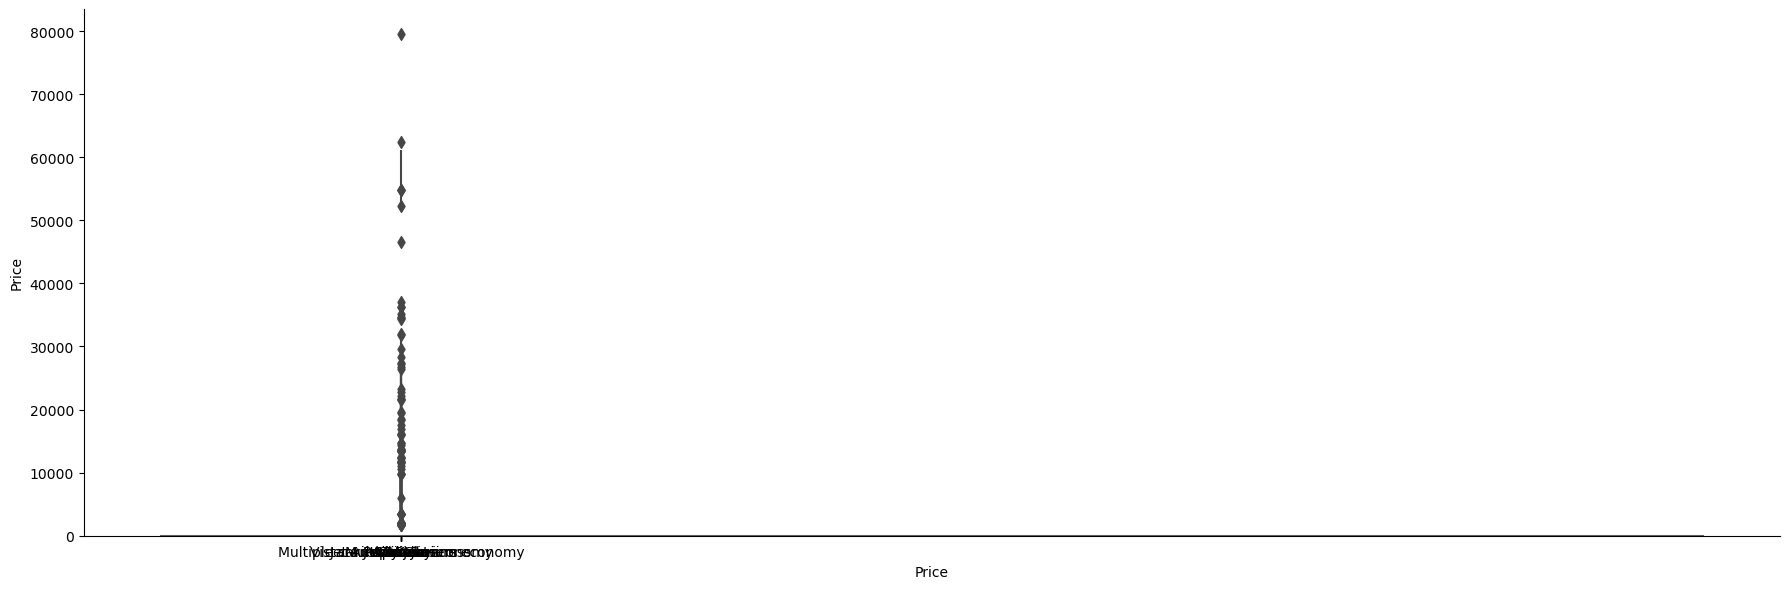

In [401]:
# distribution of error (difference between actual and predicted)
sns.distplot(y_test-y_pred)
plt.show()
# it looks like Normal distribution, hence the predictions are good

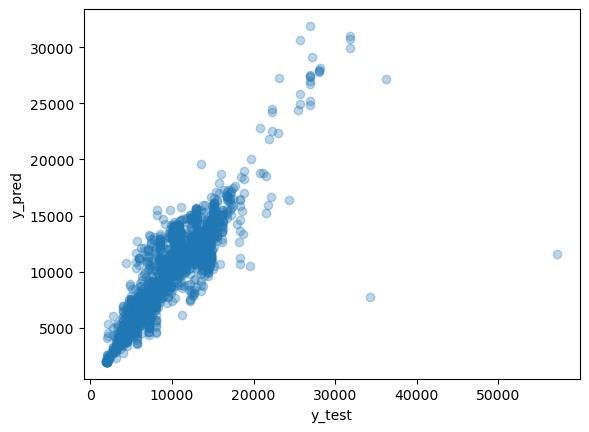

In [402]:
# plot showing y_test vs. y_pred --> if it is following linear trend then the predictions are good
plt.scatter(y_test, y_pred,alpha=0.3)   # --> alpha is just for transparency of the points
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# the trend is linear, hence our predictions are good

In [403]:
# Grid search CV for hyperparameter tuning

# Number of trees in random forest
n_estimators = np.arange(100,1001,100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = np.arange(5,31,5)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [404]:
param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [405]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=0)
# rf_grid.fit(X_train, y_train)

# gridsearchcv is taking hours and hours

# let us go with the previous 'rf' model itself

## saving model for future use and for deployment purpose

In [406]:
import pickle

file = open('flight_price_pred.pkl', 'wb')

pickle.dump(rf, file)

In [407]:
# with open("flight_price_pred.pkl", "wb") as f:
#     pickle.dump(rf, f)

# using XGB Regressor


In [408]:
from xgboost import XGBRegressor 
xgb = XGBRegressor()

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [409]:
# R2 score of Training set
xgb.score(X_train, y_train)

0.9353790824683148

In [410]:
# R2 score of Test set
xgb.score(X_test, y_test)

0.8463321179731759

In [411]:
with open("flight_price_pred.pkl", "wb") as f:
    pickle.dump(xgb, f)

# My own feature selection

In [412]:
# for this, by using domain knowledge, i will be removing following features from the dataframe

In [413]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_minutes',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [414]:
cols_to_be_dropped = ['Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_minutes']

In [415]:
df=df.drop(cols_to_be_dropped,axis=1)

In [416]:
X1 = df.drop('Price',axis=1)
y1 = df['Price']

In [417]:
# train-test split
from sklearn.model_selection import train_test_split
X1_train,X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# random forest --> with all default parameters
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()
rf1.fit(X1_train, y1_train)
y1_pred = rf1.predict(X1_test)



In [418]:
# R2 score of Training set
rf1.score(X1_train, y1_train)

0.8232912202320946

In [419]:
# R2 score of Test set
rf1.score(X1_test, y1_test)

0.7981556519166363

In [420]:
# lets use the original 